# Neural Networks

Author: Athan Zhang (athanzxyt)

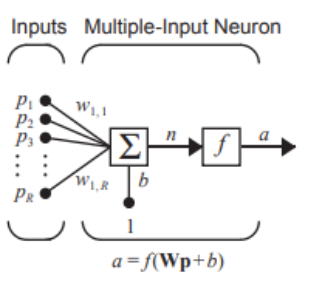

$$
a = f(\mathbf{Wx}+b)
$$

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [2]:
def line(x):
    return 3 * x + 2

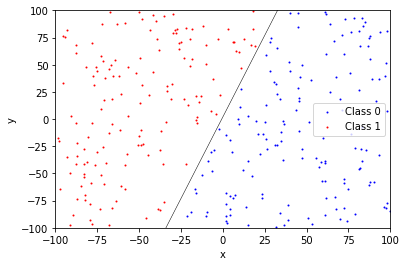

In [17]:
# Generate random points
X = np.random.uniform(low = -100, high = 100, size = (300, 2))
y = np.where(X[:, 1] > line(X[:, 0]), 1, 0)

# Give each point a class based on their location with respect to the sepearting line
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0', s = 1)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1', s = 1)

# Generate the sepearting line
line_x = np.linspace(-100, 100, 100)
plt.plot(line_x, line(line_x), color='black', linewidth=0.5)

# Plot the data with labels and a legend
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [55]:
class Perceptron:
    def __init__(self, num_in, lr=0.1):
        self.weights = np.zeros((num_in, 1))
        self.bias = 0
        self.lr = lr
        
#     def sigmoid(self, n):
#         return np.array([1 if x > 0 else 0 for x in n])
#         return 1 / (1 + )
    
#     def threshold_activation(self, n):
#         return 1 if n > 0 else 0
        
    def predict(self, X):
        n = np.dot(X, self.weights) + self.bias
        return np.array([1 if elem >= 0 else 0 for elem in n])[:, np.newaxis]
        # return 1 / (1 + np.exp(-n))
    
    def fit(self, X, y, max_epochs=200):
        for epoch in range(max_epochs):
            
            # Compute the output
            out = self.predict(X)
            
            # Calculate weight deltas
            delta_W = self.lr * np.dot(X.T, (y - out))
            delta_b = self.lr * np.sum(y - out)
            
            # Update parameters
            self.weights += delta_W
            self.bias += delta_b

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

pcp = Perceptron(2)
pcp.fit(X_train, y_train)

ValueError: non-broadcastable output operand with shape (2,1) doesn't match the broadcast shape (2,225)